In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [91]:
# reading the dataset
health = pd.read_csv("MENTAL HEALTH DATASET.csv")

In [92]:
print(health.shape)

(1259, 27)


In [93]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Missing Data

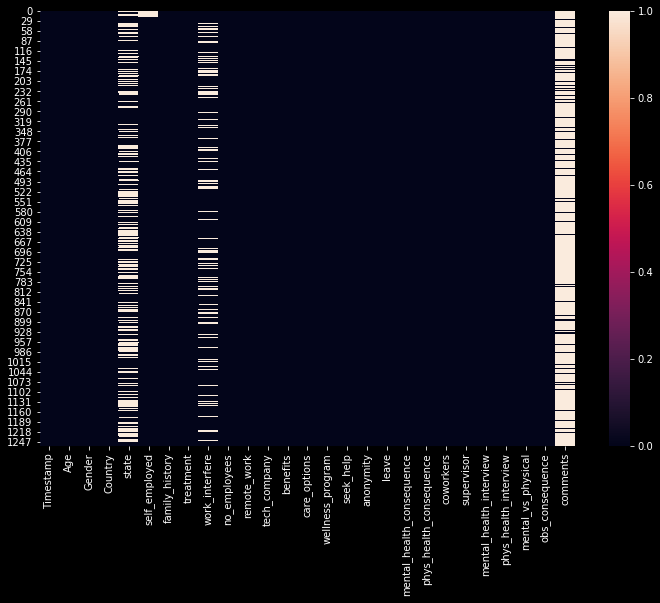

In [94]:
plt.figure(figsize=(12,8))
plt.style.use("dark_background")
sns.heatmap(health.isnull())
plt.show()

#### Missing Data Percentage List

In [95]:
for col in health.columns:
    per_missing = np.mean(health[col].isnull())
    print("{} - {}%".format(col,round(per_missing*100)))

Timestamp - 0.0%
Age - 0.0%
Gender - 0.0%
Country - 0.0%
state - 41.0%
self_employed - 1.0%
family_history - 0.0%
treatment - 0.0%
work_interfere - 21.0%
no_employees - 0.0%
remote_work - 0.0%
tech_company - 0.0%
benefits - 0.0%
care_options - 0.0%
wellness_program - 0.0%
seek_help - 0.0%
anonymity - 0.0%
leave - 0.0%
mental_health_consequence - 0.0%
phys_health_consequence - 0.0%
coworkers - 0.0%
supervisor - 0.0%
mental_health_interview - 0.0%
phys_health_interview - 0.0%
mental_vs_physical - 0.0%
obs_consequence - 0.0%
comments - 87.0%


#### Columns having more than 20% missing data 

In [96]:
drop_col = []
for col in health.columns:
    per_missing = np.mean(health[col].isnull())
    if per_missing>0.20:
        drop_col.append(col)
        print("{} - {}%".format(col,round(per_missing*100)))

state - 41.0%
work_interfere - 21.0%
comments - 87.0%


##### Dropping the columns that have more than 20 percent Null Values

In [97]:
health = health.drop(drop_col, axis=1)

#### Imputing missing value for self employed column with the "mode"

In [98]:
# impute with the most frequent value.
top = health["self_employed"].describe()['top'] 
health["self_employed"] = health["self_employed"].fillna(top)

#### Changing Timestamp to Datetime datatype

In [99]:
health['timestamp_dt'] = pd.to_datetime(health['Timestamp'], format='%d-%m-%Y %H:%M')
health['year'] = health['timestamp_dt'].dt.year
health['month'] = health['timestamp_dt'].dt.month
health['weekday'] = health['timestamp_dt'].dt.weekday
health = health.drop(["Timestamp","timestamp_dt"],axis=1)

#### Removing Outliers using IQR- Age Column

In [100]:
Q1 = health["Age"].quantile(0.25)
Q3 = health["Age"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9.0


In [101]:
ind_missing = health[(health["Age"] < (Q1 - 1.5 * IQR)) |(health["Age"] > (Q3 + 1.5 * IQR))].index

In [102]:
health = health.drop(ind_missing, axis=0)

In [103]:
health["Age"].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
20     6
49     4
47     2
Name: Age, dtype: int64

#### Removing Inconsistencies

##### Gender

In [104]:
health["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer',
       'Female (cis)', 'Mail', 'cis male', 'Malr', 'Male ', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [105]:
health['Gender'] = health['Gender'].str.lower()
health["Gender"] = health["Gender"].replace(
    ["m","male-ish",'man','maile','something kinda male?','cis male','mal','male (cis)',
     'make','guy (-ish) ^_^','msle','mail','malr','male ','cis man',
     'ostensibly male, unsure what that really means'],"male")
health["Gender"] = health["Gender"].replace(
    ['cis female','f','woman','femake','cis-female/femme','female (cis)','femail','female '],"female")
health["Gender"] = health["Gender"].replace(
    ['trans-female','non-binary','enby','queer/she/they','fluid','genderqueer','androgyne','agender'
    ,'male leaning androgynous','trans woman','neuter','female (trans)','queer','nah'],"other")

In [106]:
health["Gender"].unique()

array(['female', 'male', 'other'], dtype=object)

##### no_employee

In [107]:
health["no_employees"].unique()

array(['Jun-25', 'More than 1000', '26-100', '100-500', '01-May',
       '500-1000'], dtype=object)

In [108]:
health["no_employees"] = health["no_employees"].replace(["Jun-25"],"5-26")
health["no_employees"] = health["no_employees"].replace(['01-May'],"1-5")

In [109]:
health["no_employees"].unique()

array(['5-26', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

### Data After Cleaning

In [110]:
health.shape

(1219, 26)

In [111]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1219 non-null   int64 
 1   Gender                     1219 non-null   object
 2   Country                    1219 non-null   object
 3   self_employed              1219 non-null   object
 4   family_history             1219 non-null   object
 5   treatment                  1219 non-null   object
 6   no_employees               1219 non-null   object
 7   remote_work                1219 non-null   object
 8   tech_company               1219 non-null   object
 9   benefits                   1219 non-null   object
 10  care_options               1219 non-null   object
 11  wellness_program           1219 non-null   object
 12  seek_help                  1219 non-null   object
 13  anonymity                  1219 non-null   object
 14  leave   

In [112]:
health.to_csv('Data.csv')